# Ford GoBike System Data Analysis

### by Mahyar Khatirinejad

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Bay Area Bike Share Trips Data available at:
https://www.google.com/url?q=https://www.fordgobike.com/system-data&sa=D&ust=1554486256012000

> San Francisco offers bike ride services as a way for commuters / visitors to travel through the congested city lanes. There are about 700 bikes available through the network and the dataset incldues bike share trips data that comprises trip details from January 2019 through December 2019. 

## Gathering Data 

In [95]:
# import all the required packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import seaborn as sns
%matplotlib inline

In [96]:
data_files   = ['C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201901-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201902-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201903-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201904-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201905-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201906-baywheels-tripdata.csv',
                'C:/Us>ers/khati/Desktop/udacity/U-Data-visualization/biking_data/201907-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201908-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201909-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201910-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201911-baywheels-tripdata.csv',   
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201912-baywheels-tripdata.csv']


In [97]:
bike_data = pd.concat([pd.read_csv(f,) for f in glob.glob("C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data" + "/*.csv")],ignore_index=True)

C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### What is the structure of the dataset?

> There are 11070 bikes in this dataset with 2,506,983 rows and 15 features (duration_sec, start time, end time, start station id, start station name,start_station_latitude, start_station_longitude,end station id, end station name, end_station_latitude, end_station_longitude, bike_id, user_type, bike share for all trip, rental access method).

### What is/are the main feature(s) of interest in your dataset?

> We are looking at the Start Station and End Station to understand the how customer behaviour differs based on the stations by looking at the top 10 stations. It is important to view station usage for the company to monitor busy stations to make sure enough bikes are available for use or empty spots available for bike drop offs.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some attributes such as time, user type and start/end_station_name id will help support my investigation 

## Assessing Data

In [98]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [99]:
print(bike_data.shape)
print(bike_data.dtypes)

(2506983, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object


In [100]:
sum(bike_data.duplicated())

0

In [101]:
#maybe i should drop the null columns
bike_data.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [102]:
bike_data.start_station_name.value_counts()

Market St at 10th St                                         45058
Berry St at 4th St                                           42962
San Francisco Caltrain (Townsend St at 4th St)               40302
San Francisco Ferry Building (Harry Bridges Plaza)           39016
San Francisco Caltrain Station 2  (Townsend St at 4th St)    36576
                                                             ...  
Prototype Lab                                                    4
San Jose Depot                                                   3
Mercado Way at Sierra Rd                                         3
Philly Demo                                                      2
SF Test Station                                                  1
Name: start_station_name, Length: 446, dtype: int64

In [103]:
bike_data.bike_id.nunique()

11070

In [104]:
bike_data.bike_id.value_counts()

3135      912
3146      911
3569      889
3249      882
1502      882
         ... 
3973        1
655034      1
92          1
3214        1
6271        1
Name: bike_id, Length: 11070, dtype: int64

In [105]:
bike_data.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [106]:
bike_data.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [107]:
bike_data.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

# Cleaning Dataset 

### 1. Define:
***Droping the "bike_share_for_all_trip" and "rental_access_method" becuse the first one is not documented and second one has so many NaN values.***
### Code:

In [108]:
bike_data.drop(['bike_share_for_all_trip','rental_access_method'],inplace=True,axis=1)

In [109]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 248.6+ MB


### 2. Define: 
***converting the 'start_station_id', 'end_station_id', 'bike_id', to strings***
   
***Converting the 'start_time' and 'end_time' to datatime***
### Code

In [110]:
bike_data['start_station_id']= bike_data['start_station_id'].astype('str')
bike_data['end_station_id']= bike_data['end_station_id'].astype('str')
bike_data['bike_id']= bike_data['bike_id'].astype('str')

bike_data['start_time']= bike_data['start_time'].astype('datetime64[ns]')
bike_data['end_time']= bike_data['end_time'].astype('datetime64[ns]')
#df_bike_clean['duration_sec']= df_bike_clean['duration_sec'].astype('datetime64[ns]')

In [111]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 248.6+ MB


In [112]:
# extract three columns for future data exploration and analysis from the start_time column
bike_data['month'] = pd.DatetimeIndex(bike_data['start_time']).month
bike_data['trip_day'] = bike_data.start_time.dt.strftime('%a')
bike_data['trip_hour'] = bike_data.start_time.dt.strftime('%H')

In [113]:
bike_data.month.value_counts()

7     258102
3     256299
10    239895
4     239111
9     217986
8     210563
1     192082
6     191772
11    185496
2     183412
5     182163
12    150102
Name: month, dtype: int64

In [114]:
bike_data.trip_day.value_counts()

Tue    427640
Thu    424474
Wed    414448
Fri    397284
Mon    396463
Sat    234370
Sun    212304
Name: trip_day, dtype: int64

### 3. Define:

***Dropping non-essential columns for convenience:*** 

### Code:

In [115]:
bike_data.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [116]:
#We make a copy of the dataset to keep the original list unchanged when the new list is modified
df_bike_clean = bike_data.copy()
df_bike_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration_sec        int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   bike_id             object        
 6   user_type           object        
 7   month               int64         
 8   trip_day            object        
 9   trip_hour           object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 191.3+ MB


## Univariate Exploration


### 1. Top 10 Start Station

In [117]:
#univariate comparing the number of times start station occurs, only want to look at top ten station
#use value_counts() to get top ten
freq_station = df_bike_clean.start_station_name.value_counts()
y = freq_station.values[0:10] 
x = freq_station.index[0:10]
j = []
for i in x:
    j.append(i)
    
print(j)
    

['Market St at 10th St', 'Berry St at 4th St', 'San Francisco Caltrain (Townsend St at 4th St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)', 'Steuart St at Market St', 'Howard St at Beale St', 'Powell St BART Station (Market St at 5th St)']


In [118]:
start_station_counts = df_bike_clean.start_station_name.value_counts()
y = start_station_counts.values[0:10] 
x = start_station_counts.index[0:10]

    

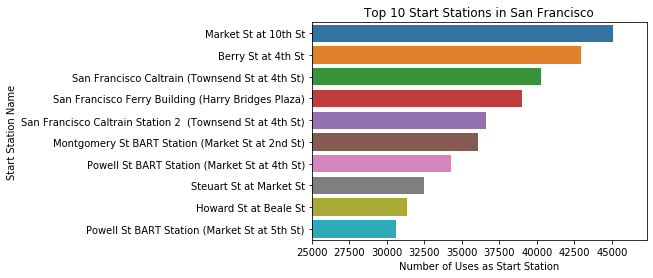

In [119]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_bike_clean, y='start_station_name', order=x)
plt.xlim(25000,None)
plt.xlabel('Number of Uses as Start Station')
plt.ylabel('Start Station Name')
plt.title('Top 10 Start Stations in San Francisco');

### Observation: 
> "Market St at 10th" st is the most popular start station regardless user types.

### 2. Top 10 End Station

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Market St at 10th St', 'Berry St at 4th St',
       'Powell St BART Station (Market St at 4th St)',
       'Steuart St at Market St', 'The Embarcadero at Sansome St',
       'Powell St BART Station (Market St at 5th St)'],
      dtype='object')


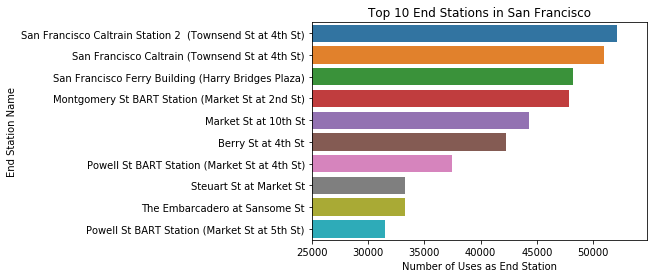

In [120]:
end_station_counts = df_bike_clean.end_station_name.value_counts()
y = end_station_counts.values[0:10] 
x = end_station_counts.index[0:10]
print(x)

base_color = sb.color_palette()[0]
sb.countplot(data=df_bike_clean, y='end_station_name', order=x)
plt.xlim(25000,None)
plt.xlabel('Number of Uses as End Station')
plt.ylabel('End Station Name')
plt.title('Top 10 End Stations in San Francisco');
    

### Observation:
> "San Francisco Caltrain Station"  is the most popular End Station regardless user types.
>> Although "Market St at 10th St" was a busy start station, it is only the fifth most popular end station. It may be more importatant for this station to have bikes for pick up rather than drop off. Some stations are popular as both start and end stations such as 'San Francisco Caltrain (Townsend St at 4th St)' and 'San Francisco Ferry Building (Harry Bridges Plaza)'. For these stations both bike pick up and drop off is importatant to monitor.


### 3. User Types Distribution:

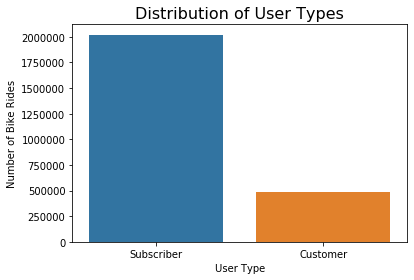

In [121]:
sb.countplot(data = df_bike_clean, x = 'user_type')
plt.title('Distribution of User Types',fontsize=16);
plt.ylabel('Number of Bike Rides');
plt.xlabel('User Type');

### Observation:
> There are significantly more subscriber(members) cyclists than customer(non_members.

# Bivariate Exploration

### 1. Visualize top 10 stations of subscriber users 

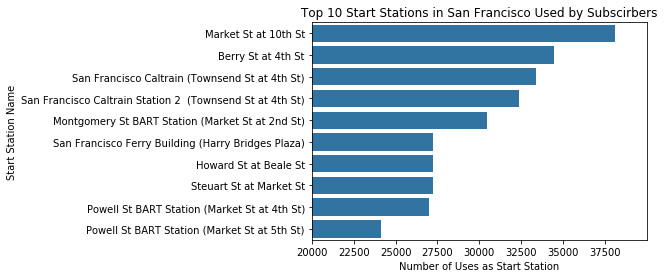

In [122]:
#only look at start stations
sub_station_counts = df_bike_clean.query('user_type == "Subscriber"').start_station_name.value_counts()
sub_y = sub_station_counts.values[0:10] 
sub_x = sub_station_counts.index[0:10]
#print(sub_station_counts)

sb.countplot(data=df_bike_clean.query('user_type == "Subscriber"'), y='start_station_name', order=sub_x, color=sb.color_palette()[0])
plt.xlim(20000,None)
plt.xlabel('Number of Uses as Start Station')
plt.ylabel('Start Station Name')
plt.title('Top 10 Start Stations in San Francisco Used by Subscirbers');

### Observation
> "Market St at 10th st" is the most popular start station used by Subscribers.

### 2. Visualize top 10 stations of Customer


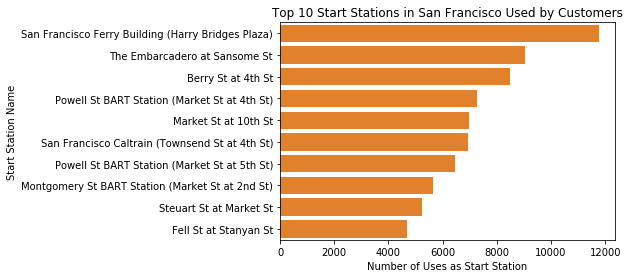

In [123]:
cus_station_counts = df_bike_clean.query('user_type == "Customer"').start_station_name.value_counts()
cus_y = cus_station_counts.values[0:10] 
cus_x = cus_station_counts.index[0:10]

sb.countplot(data=df_bike_clean.query('user_type == "Customer"'), y='start_station_name', order=cus_x, color=sb.color_palette()[1])
plt.xlim(0,None)
plt.xlabel('Number of Uses as Start Station')
plt.ylabel('Start Station Name')
plt.title('Top 10 Start Stations in San Francisco Used by Customers');

### Observation
> "San Francisco Caltrain Station"  is the most popular Start Station used by Customer.

>> As a result, the most popular start stations is so different based on the type of users. However, we need to consider the distribution of user types in which the subscriber's number is 3 times more than customer's cyclists. While the top 10 stations used in general reveals Market St at 10th St is the most used, more of the data is from subscribers rather than customers.Therefore, it is worth looking at station usage based on user type because customers and subscribers do not use the same stations equally.

### 3. Hourly Distribution of "Market St at 10th St"

In [124]:
counts = df_bike_clean.query('start_station_name == "Market St at 10th St"').trip_hour.value_counts().sort_index()
i = counts.values[0:24]
j = counts.index[0:24]

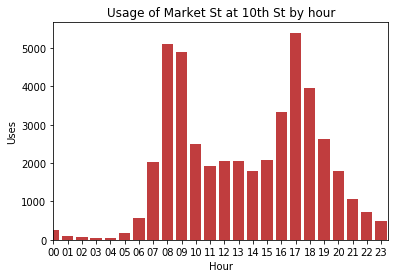

In [125]:
sb.countplot(data= df_bike_clean.query('start_station_name == "Market St at 10th St"'), x = 'trip_hour', order= j, color=sb.color_palette()[3])
plt.xlim(0,None)
plt.xlabel('Hour')
plt.ylabel('Uses')
plt.title('Usage of Market St at 10th St by hour');

### Observation:
> Looking at the most popular start station, we can see that it used most frequently in the morning (7am-10am) and evening (4pm-7pm). These two intervals have a similar peak usage and usages during the hours in between are similar to each other. This matches with the times people most commonly travel to and from work or school.

### 4. Hourly Distribution of "Market St at 10th St"

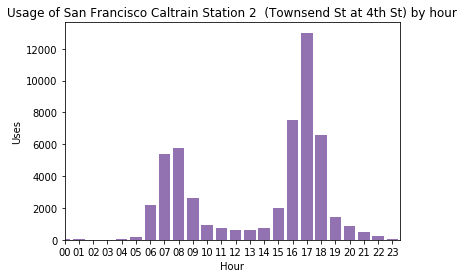

In [126]:
cus_counts = df_bike_clean.query('end_station_name == "San Francisco Caltrain Station 2  (Townsend St at 4th St)"').trip_hour.value_counts().sort_index()
end_i = counts.values[0:24]
end_j = counts.index[0:24]

sb.countplot(data= df_bike_clean.query('end_station_name == "San Francisco Caltrain Station 2  (Townsend St at 4th St)" '), x = 'trip_hour', order= end_j, color=sb.color_palette()[4])
plt.xlim(0,None)
plt.xlabel('Hour')
plt.ylabel('Uses')
plt.title('Usage of San Francisco Caltrain Station 2  (Townsend St at 4th St) by hour');

### Observation:
>  Looking at the most popular end station, we can see that it used most frequently in the morning (7am-8am) and evening (4pm-6pm). The morning peak is roughly half that of the evening peak. In addition, the off peak hours see hardly any usage. The most usage is concentrated in the evening.

# Multivariate Exploration

###  Comparing the relationship of number trips within 24 hours between user types

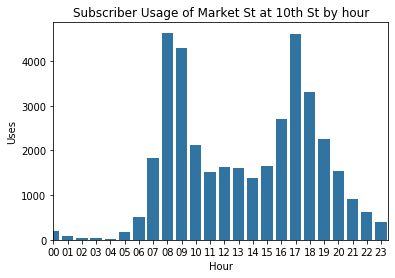

In [127]:
counts = df_bike_clean.query('start_station_name == "Market St at 10th St" & user_type == "Subscriber"').trip_hour.value_counts().sort_index()
i = counts.values[0:24]
j = counts.index[0:24]

sb.countplot(data= df_bike_clean.query('start_station_name == "Market St at 10th St" & user_type == "Subscriber"'), x = 'trip_hour', order= j, color=sb.color_palette()[0])
plt.xlim(0,None)
plt.xlabel('Hour')
plt.ylabel('Uses')
plt.title('Subscriber Usage of Market St at 10th St by hour');



### Observation
> At the most popular start station, subscriber usage shows a similar trend to general usage over the course of a day. The peaks are at the same times of day, morning and evening, and the hours in between have roughly equal usage. The two peaks are also about equal. Becuase the subscribers make up more than half of the data, this may be why the subscriber specific and the non-specific usage graphs look simialar.

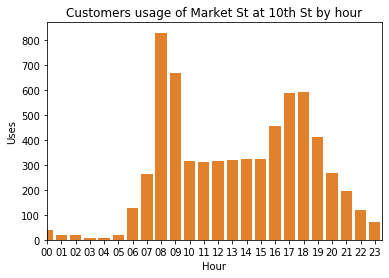

In [128]:
cus_counts = df_bike_clean.query('end_station_name == "Market St at 10th St" & user_type == "Customer"').trip_hour.value_counts().sort_index()
end_i = counts.values[0:24]
end_j = counts.index[0:24]

sb.countplot(data= df_bike_clean.query('end_station_name == "Market St at 10th St" & user_type == "Customer"'), x = 'trip_hour', order= end_j, color=sb.color_palette()[1])
plt.xlim(0,None)
plt.xlabel('Hour')
plt.ylabel('Uses')
plt.title('Customers usage of Market St at 10th St by hour');

### Observation
> For customers, the peaks also occur in the morning and evening but unqually. there is a higher usage in the morning than there is in the evenin'g.

In [129]:
df_bike_clean.to_csv('df_bike_clean.csv', index=False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Regardless of user type, the morning (7am-9am) always had the largest peak. This suggests it would be worth FordGoBike's time to always monitor Market St at 10th St during this time. The evening also had a peak but it was greater for subscribers than for customers. Subscribers also make up a larger demographic of users so FordGoBike may benefit from looking more into stations and times frequented by subscribers over customers. 

